# Teorema del limite Central

In [0]:
import scipy as sp
from scipy import stats

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

mpl.style.use('classic')
        
plt.rc('figure', figsize = (6, 4.5))
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)

# Lanzando dados

Considere lanzar un dado justo de 6 lados muchas veces y registrar los resultados.
Esta distribucion "original" tiene una media y varianza dadas por
- $\mu = \sum_{i=1}^6 p_i\, i = \sum_{i=1}^6 \frac{1}{6}\times i$
- $\sigma^2 = \frac{1}{6}\sum_{i=1}^6(i-\mu)^2$

In [21]:
i = np.arange(1, 7, 1)
mu = sum(i)/6
sigma = np.sqrt(sum((i - mu)**2)/6)
mu, sigma

(3.5, 1.707825127659933)

El siguiente codigo simula el lanzamiento de un dado 10 veces muestreando numeros aleatorios entre 1 y 6:

In [22]:
low, high, n = (1, 6, 10)
sp.stats.randint.rvs(low, high+1, size=n)
#sp.random.randint(low, high+1, n)

array([6, 2, 1, 4, 6, 6, 4, 6, 6, 1])

Y el promedio de una muestra de 10 numero de la distribución es

In [23]:
sum(sp.stats.randint.rvs(low, high+1, size=n))/n

2.5

ó

In [24]:
np.mean(sp.stats.randint.rvs(low, high+1, size=n))

2.3

La media de un número fijo de lanzamientos es por si misma una variable aleatoria. La pregunta es: Cual es la distribución de probabilidad para la media? Repitamos el experimento 1000 veces y miremos la distribución de los valores, pero dejemos que el numero de lanzadas en cada experimento sea de $n=400$.

In [0]:
#Simulacion no tan pytonica
n_ex = 1000
n = 400
sim_data = np.array([])
for i in range(n_ex):
    sim_data = np.append(sim_data, np.mean(sp.stats.randint.rvs(low, high+1, size=n)))

In [0]:
# Simulacion mas concisa
n_ex = 1000
n = 400
sim_data = np.array([np.mean(sp.random.randint(low, high+1, n)) for i in range(n_ex)])

Graficamos las muestras obtenidas

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


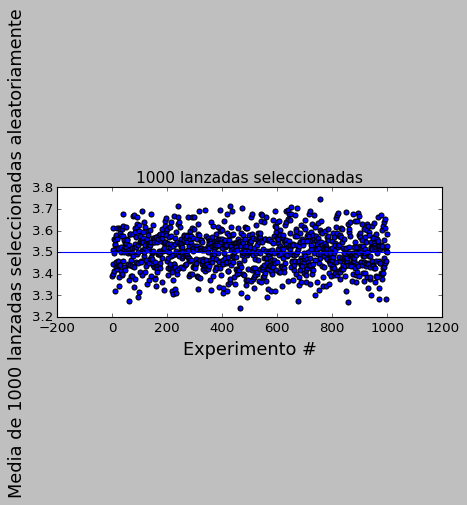

In [27]:
plt.figure(1)
x = np.linspace(0, n_ex, n_ex)
y = sim_data
plt.axhline(mu)
plt.xlabel('Experimento #')
plt.ylabel('Media de %s lanzadas seleccionadas aleatoriamente'%(n_ex))
plt.title('%s lanzadas seleccionadas'%(n_ex))
plt.scatter(x, y)

In [28]:
len(sim_data), len(x)

(1000, 1000)

El teorema del limite central dice que estos datos deberian aproximarse a una distribucion normal con media y desviación estandar dadas por
- $\mu_\text{sample} =\mu$
- $\sigma_\text{sample} = \frac{\sigma}{\sqrt{n}}$

Miremos el histograma de las medias muestrales.

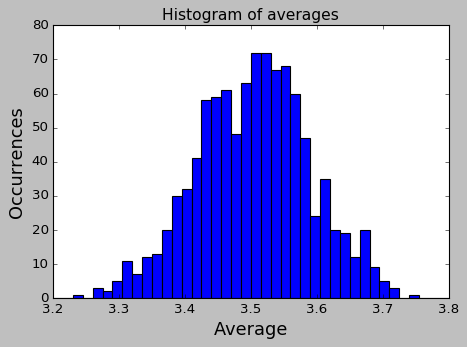

In [29]:
plt.figure(2)
nbin, low, high = [40, 3.20, 3.80]
plt.xlim(low, high)
plt.xlabel("Average")
plt.ylabel("Occurrences")
plt.title("Histogram of averages")
plt.hist(sim_data,nbin, [low,high], edgecolor='black');
plt.show()

El histograma es similar a una distribucion normal, pero verifiquemos la media y la desviación estandar.
Segun el TLC $\mu_\text{TLC} = \mu$ and $\sigma_\text{TLC}= \sigma/\sqrt{400}$.

In [31]:
mu_sample = np.mean(sim_data)
sigma_sample = np.std(sim_data)
mu_sample, sigma_sample

(3.5027325, 0.0860364875721342)

In [33]:
sigmaCLT = sigma/np.sqrt(n)
sigmaCLT

0.08539125638299665